In [29]:
import os
import pandas as pd
import numpy as np
import re
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
import string

In [30]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import nltk.translate.gleu_score as gleu
from nltk.translate.meteor_score import meteor_score
from nltk.translate.nist_score import sentence_nist
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from rouge import Rouge
from nltk import RegexpTokenizer

In [31]:
import spacy

In [32]:
from glob import glob

In [5]:
os.getcwd()

'C:\\Users\\doris\\Documents\\Text Mining\\Project\\Text-Mining-Project'

In [9]:
all_files = glob(os.path.join(os.getcwd(), "/cs_en/corpus/*.csv"))
print(all_files)

[]


In [14]:
list_of_names = ['cs_en', 'de_en', 'en_fi', 'en_zh', 'ru_en', 'zh_en', 'en_fi', 'en_zh']

In [15]:
# create empty list
dataframes_list = []
  
# append datasets into teh list
for i in range(len(list_of_names)):
    temp_df = pd.read_csv("corpus/"+ list_of_names[i]+"/scores.csv")
    dataframes_list.append(temp_df)

FileNotFoundError: [Errno 2] File corpus/cs_en/scores.csv does not exist: 'corpus/cs_en/scores.csv'

In [18]:
pd.read_csv("corpus/cs-en/scores.csv")

,source,reference,translation,z-score,avg-score,annotators
0,Uchopíte pak zbraň mezi své předloktí a rameno...,You will then grab the weapon between your for...,You then grasp the gun between your forearm an...,-0.675383,60.000000,3
1,"Ale je-li New York změna, pak je to také znovu...","But if New York is changed, then it's also a r...","But if New York is change, it is also reinvent...",-0.829403,44.000000,2
2,"Dlouho a intenzivně jsem během léta přemýšlel,...",I have been thinking over and over again over ...,I have thought long and hard over the course o...,0.803185,96.500000,2
3,"Najdou si jiný způsob, jak někde podvádět.",They find another way to cheat somewhere.,They will find another way how to defraud others.,0.563149,90.500000,2
4,Zpráva o výměně v čele prezidentovy administra...,The report on the replacement of the president...,The news of the replacement at the top of the ...,0.021549,74.666667,3
...,...,...,...,...,...,...
11580,"Rahman podle svých slov „vedl svou kampaň tak,...","Rahman according to his words, ""he led his cam...","Rahman, it was said, ""ran his campaign on the ...",-0.100525,56.000000,1
11581,"Cokoliv jiného, než návrat domů ke své rodině ...",Anything other than returning home to his fami...,Anything less than heading back to her family'...,0.204757,69.000000,1
11582,"Existují zde jiné, menší značky pro privátní b...","There are other, smaller brands for private ba...","There are other, smaller brands for private ba...",-0.949293,32.000000,1
11583,"Nejpíš to pro Brity sice nebude útěchou, ale m...",Probably will not be comforting for the Britis...,It may be some consolation to GB - but probabl...,0.423091,76.000000,1


In [21]:
cs_en = pd.read_csv("corpus/cs-en/scores.csv")
de_en = pd.read_csv("corpus/de-en/scores.csv")
en_fi = pd.read_csv("corpus/en-fi/scores.csv")
en_zh = pd.read_csv("corpus/en-zh/scores.csv")
ru_en = pd.read_csv("corpus/ru-en/scores.csv")
zh_en = pd.read_csv("corpus/zh-en/scores.csv")

data_to_eng = [cs_en, de_en, ru_en, zh_en]
data_from_eng = [en_fi, en_zh]

In [22]:
cs_en.head()

,source,reference,translation,z-score,avg-score,annotators
0,Uchopíte pak zbraň mezi své předloktí a rameno...,You will then grab the weapon between your for...,You then grasp the gun between your forearm an...,-0.675383,60.000000,3
1,"Ale je-li New York změna, pak je to také znovu...","But if New York is changed, then it's also a r...","But if New York is change, it is also reinvent...",-0.829403,44.000000,2
2,"Dlouho a intenzivně jsem během léta přemýšlel,...",I have been thinking over and over again over ...,I have thought long and hard over the course o...,0.803185,96.500000,2
3,"Najdou si jiný způsob, jak někde podvádět.",They find another way to cheat somewhere.,They will find another way how to defraud others.,0.563149,90.500000,2
4,Zpráva o výměně v čele prezidentovy administra...,The report on the replacement of the president...,The news of the replacement at the top of the ...,0.021549,74.666667,3


In [7]:
#for df in data:
    #print(df.shape)
    #print(df['avg-score'].describe())
    #print(pd.isnull(df).sum())

In [23]:
cs_en = pd.DataFrame(data=cs_en,columns=['reference','translation','z-score'])
de_en = pd.DataFrame(data=de_en,columns=['reference','translation','z-score'])
en_fi = pd.DataFrame(data=en_fi,columns=['reference','translation','z-score'])
en_zh = pd.DataFrame(data=en_zh,columns=['reference','translation','z-score'])
ru_en = pd.DataFrame(data=ru_en,columns=['reference','translation','z-score'])
zh_en = pd.DataFrame(data=zh_en,columns=['reference','translation','z-score'])

In [24]:
cs_en.shape

(11585, 3)

In [25]:
cs_en.head()

,reference,translation,z-score
0,You will then grab the weapon between your for...,You then grasp the gun between your forearm an...,-0.675383
1,"But if New York is changed, then it's also a r...","But if New York is change, it is also reinvent...",-0.829403
2,I have been thinking over and over again over ...,I have thought long and hard over the course o...,0.803185
3,They find another way to cheat somewhere.,They will find another way how to defraud others.,0.563149
4,The report on the replacement of the president...,The news of the replacement at the top of the ...,0.021549


## Preprocessing

In [22]:
stop_en = set(stopwords.words('english'))
stop_fi = set(stopwords.words('finnish'))
# stop_zh = chinese library needed 
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer('english')

In [11]:
def number_token(text):
    """
    Function that receives a string of text and returns the string with 
    the cost formats within it substituted by the token #COST
    """
    tokenized_text = re.sub('(\d+|\d+.\d+)(| )','##',text)
        
    return tokenized_text

In [236]:
en_zh["reference"] = [number_token(x) for x in en_zh["reference"]]
en_zh["translation"] = [number_token(x) for x in en_zh["translation"]]

In [80]:
def clean(text_list, lemmatize=False, stemmer=False, punctuation = False, stop_words=False, stop = stop_en):
    """
    Function that a receives a list of strings and preprocesses it.
    
    :param text_list: List of strings.
    :param lemmatize: Tag to apply lemmatization if True.
    :param stemmer: Tag to apply the stemmer if True.
    """
    updates = []
    for j in tqdm(range(len(text_list))):
        
        text = text_list[j]
        
        #LOWERCASE TEXT
        text = text.lower()
        
        #REMOVE NUMERICAL DATA AND PUNCTUATION
        if punctuation:
            text = re.sub("[^a-zA-Z]", ' ', text)
        
        #REMOVE TAGS (HTML)
        text = BeautifulSoup(text).get_text()
        
        #REMOVE STOP WORDS - not needed 
        if stop_words:
            text = " ".join([word for word in text.split() if word not in stop])
        
        #LEMMATIZATION
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        #STEMMER
        if stemmer:
            text = " ".join(snowball_stemmer.stem(word) for word in text.split())
        
        updates.append(text)
        
    return updates

def update_df(dataframe, list_updated, column):
    dataframe.update(pd.DataFrame({column: list_updated}))

In [237]:
#for df in data_to_eng:
updates = clean(en_zh["reference"], lemmatize = False, stemmer = False, stop_words=False, stop = stop_en)
update_df(en_zh, updates, "reference")

<ipython-input-80-6840b97db51b>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm(range(len(text_list))):


  0%|          | 0/10221 [00:00<?, ?it/s]

In [238]:
updates = clean(en_zh["translation"], lemmatize = False, stemmer = False, stop_words=False, stop = stop_en)
update_df(en_zh, updates, "translation")

<ipython-input-80-6840b97db51b>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm(range(len(text_list))):


  0%|          | 0/10221 [00:00<?, ?it/s]

In [26]:
#updates = clean(df["translation"], lemmatize = False, stemmer = False)
#update_df(df, updates, "translation")

In [27]:
def total_word_freq(text_list):
    """
    Function that receives a list of strings and returns the frequency of each word
    in the set of all strings.
    """
    words_in_df = ' '.join(text_list).split()
    # Count all words 
    freq = pd.Series(words_in_df).value_counts()
    return freq

In [28]:
# Fetch wordcount for each abstract
def word_count(df):
    word_count_ref  = df['reference'].apply(lambda x: len(str(x).split(" ")))
    word_count_tra  = df['translation'].apply(lambda x: len(str(x).split(" ")))
    df['word_count_ref'] = word_count_ref
    df['word_count_tra'] = word_count_tra

In [29]:
word_count(cs_en)

In [51]:
cs_en.head()

,reference,translation,z-score,word_count_ref,word_count_tra
0,you will then grab the weapon between your for...,you then grasp the gun between your forearm an...,-0.675383,23,20
1,"but if new york is changed, then it's also a r...","but if new york is change, it is also reinvent...",-0.829403,11,10
2,i have been thinking over and over again over ...,i have thought long and hard over the course o...,0.803185,29,33
3,they find another way to cheat somewhere.,they will find another way how to defraud others.,0.563149,7,9
4,the report on the replacement of the president...,the news of the replacement at the top of the ...,0.021549,20,26


## Bag-of-words

In [52]:
cv = CountVectorizer(max_df=0.9, binary=True)

In [53]:
X = cv.fit_transform(cs_en["reference"])

In [54]:
X

<11585x11326 sparse matrix of type '<class 'numpy.int64'>'
	with 183194 stored elements in Compressed Sparse Row format>

In [55]:
list(cv.vocabulary_.keys())[:10]

['you',
 'will',
 'then',
 'grab',
 'the',
 'weapon',
 'between',
 'your',
 'forearm',
 'and']

In [56]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [57]:
top_df = get_top_n_grams(cs_en["reference"], top_k=20, n=1)

In [58]:
top_df.head(10)

,Ngram,Freq
0,the,16608
1,of,6705
2,and,5597
3,to,5516
4,in,5384
5,that,2590
6,is,2348
7,for,2230
8,it,2146
9,on,1883


In [59]:
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

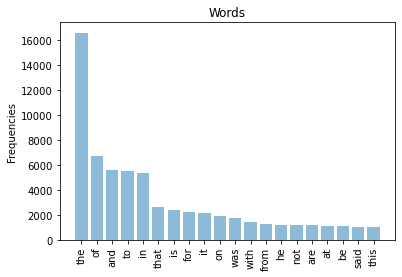

In [60]:
plot_frequencies(top_df)

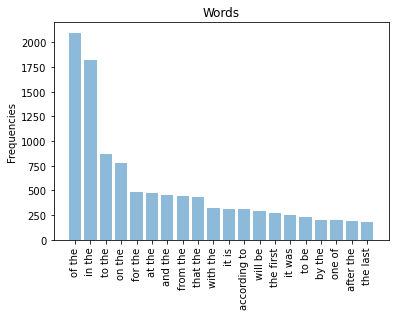

In [61]:
top_df = get_top_n_grams(cs_en["reference"], top_k=20, n=2)
plot_frequencies(top_df)

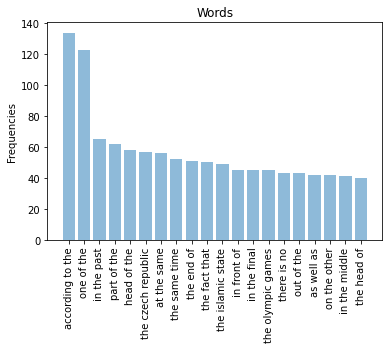

In [62]:
top_df = get_top_n_grams(cs_en["reference"], top_k=20, n=3)
plot_frequencies(top_df)

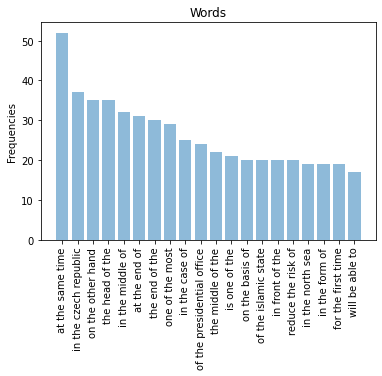

In [63]:
top_df = get_top_n_grams(cs_en["reference"], top_k=20, n=4)
plot_frequencies(top_df)

In [64]:
tfidf_vectorizer = TfidfTransformer()
tfidf_vectorizer.fit(X)

TfidfTransformer()

In [65]:
# get feature names
feature_names = cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc = cs_en["reference"][53]
 
#generate tf-idf for the given document
tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))

In [190]:
tf_idf_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [191]:
def extract_feature_scores(feature_names, document_vector):
    """
    Function that creates a dictionary with the TF-IDF score for each feature.
    :param feature_names: list with all the feature words.
    :param document_vector: vector containing the extracted features for a specific document
    
    :return: returns a sorted dictionary "feature":"score".
    """
    feature2score = {}
    for i in range(len(feature_names)):
        feature2score[feature_names[i]] = document_vector[0][i]    
    return sorted(feature2score.items(), key=lambda kv: kv[1], reverse=True)

In [192]:
extract_feature_scores(feature_names, tf_idf_vector.toarray())[:10]

[('ivanova', 0.7001323240650809),
 ('request', 0.5471389975751094),
 ('putin', 0.45875227098264365),
 ('aaron', 0.0),
 ('aba', 0.0),
 ('ababa', 0.0),
 ('abandon', 0.0),
 ('abas', 0.0),
 ('abasa', 0.0),
 ('abaseov', 0.0)]

## Models

In [228]:
import nltk.translate.gleu_score as sentence_gleu
from rouge import Rouge
from nltk.translate.nist_score import sentence_nist

In [193]:
# baseline bleu
from nltk.translate.bleu_score import sentence_bleu

#print('Cumulative 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
#print('Cumulative 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))
#print('Cumulative 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0)))

In [40]:
def evaluate_bleu(df):
    df['reference1'] = [[x.split()] for x in df['reference']]
    df['translation1'] = [x.split() for x in df['translation']]
    df['bleu'] = df.apply(lambda x: sentence_bleu(x['reference1'], x['translation1'], weights=(1,0,0,0)), axis=1)
    df.drop(columns = ['reference1','translation1'],inplace=True)
    return df 

def gleu(df):
    df['reference1'] = [[x.split()] for x in df['reference']]
    df['translation1'] = [x.split() for x in df['translation']]
    df['gleu'] = df.apply(lambda x: sentence_gleu(x['reference1'], x['translation1'], weights=(1,0,0,0)), axis=1)
    df.drop(columns = ['reference1','translation1'],inplace=True)
    return df 

def NIST(df):
    #df['reference1'] = [[x.split()] for x in df['reference']]
    #df['translation1'] = [x.split() for x in df['translation']]
    df['nist'] = df.apply(lambda x: sentence_nist(x['reference'], x['translation']),axis=1)
    return df 

# measures recall
def ROUGE(df):
    df['rouge'] = df.apply(lambda x: Rouge.get_scores(x['translation'], [x['reference']], avg=True),axis=1)
    return df

def bleu_rouge(Bleu, Rouge):
    F1 = 2 * (Bleu * Rouge) / (Bleu + Rouge)
    return F1

def METEOR(df):
    #df['reference'] = [[x.split()] for x in df['reference']]
    #df['translation'] = [x.split() for x in df['translation']]
    df['meteor'] = df.apply(lambda x: meteor_score([x['reference']], x['translation']),axis=1)
    #If no words match during the method returns the score of 0
    return df


In [ ]:
langauge_list = 

In [39]:
sentence_nist(cs_en['reference'][12],cs_en['translation'][12])

0.11928166216768607

In [27]:
clean_csen = cs_en.copy()

In [33]:
METEOR(clean_csen)

,reference,translation,z-score,meteor
0,You will then grab the weapon between your for...,You then grasp the gun between your forearm an...,-0.675383,0.647455
1,"But if New York is changed, then it's also a r...","But if New York is change, it is also reinvent...",-0.829403,0.516055
2,I have been thinking over and over again over ...,I have thought long and hard over the course o...,0.803185,0.765853
3,They find another way to cheat somewhere.,They will find another way how to defraud others.,0.563149,0.619444
4,The report on the replacement of the president...,The news of the replacement at the top of the ...,0.021549,0.277888
...,...,...,...,...
11580,"Rahman according to his words, ""he led his cam...","Rahman, it was said, ""ran his campaign on the ...",-0.100525,0.561616
11581,Anything other than returning home to his fami...,Anything less than heading back to her family'...,0.204757,0.461069
11582,"There are other, smaller brands for private ba...","There are other, smaller brands for private ba...",-0.949293,0.718326
11583,Probably will not be comforting for the Britis...,It may be some consolation to GB - but probabl...,0.423091,0.586654


In [34]:
evaluate_bleu(clean_csen)

C:\Users\doris\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\doris\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\doris\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

,reference,translation,z-score,meteor,bleu
0,You will then grab the weapon between your for...,You then grasp the gun between your forearm an...,-0.675383,0.647455,0.645531
1,"But if New York is changed, then it's also a r...","But if New York is change, it is also reinvent...",-0.829403,0.516055,0.542902
2,I have been thinking over and over again over ...,I have thought long and hard over the course o...,0.803185,0.765853,0.636364
3,They find another way to cheat somewhere.,They will find another way how to defraud others.,0.563149,0.619444,0.555556
4,The report on the replacement of the president...,The news of the replacement at the top of the ...,0.021549,0.277888,0.269231
...,...,...,...,...,...
11580,"Rahman according to his words, ""he led his cam...","Rahman, it was said, ""ran his campaign on the ...",-0.100525,0.561616,0.478261
11581,Anything other than returning home to his fami...,Anything less than heading back to her family'...,0.204757,0.461069,0.478261
11582,"There are other, smaller brands for private ba...","There are other, smaller brands for private ba...",-0.949293,0.718326,0.608696
11583,Probably will not be comforting for the Britis...,It may be some consolation to GB - but probabl...,0.423091,0.586654,0.539330


In [ ]:
NIST(clean_csen)

In [235]:
ROUGE(clean_csen)

TypeError: get_scores() missing 1 required positional argument: 'refs'

## Evaluate

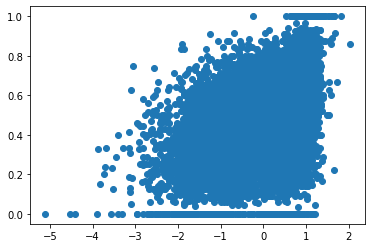

In [216]:
from matplotlib import pyplot
pyplot.scatter(clean_csen['z-score'], clean_csen['bleu'])
pyplot.show()

In [245]:
from scipy.stats import kendalltau
from scipy.stats import pearsonr
kendalltau(clean_enzh['z-score'], clean_enzh['bleu'])

KendalltauResult(correlation=0.006092200466591761, pvalue=0.4496644917384327)

In [244]:
pearsonr(clean_enzh['z-score'], clean_enzh['bleu'])

(0.027343797324263654, 0.005699118713376936)

In [219]:
kendalltau(clean_csen['z-score'], clean_csen['meteor'])

KendalltauResult(correlation=0.26861300731477705, pvalue=0.0)

In [221]:
pearsonr(clean_csen['z-score'], clean_csen['meteor'])

(0.3957474789630241, 0.0)